# Navigating Parse Trees

## Going down: `.children` and `.descendants`


In the BeautifulSoup library, there is a distinction drawn between **<font color='red'>children</font>** and **<font color='red'>descendants</font>**: much like in a human family tree, children are always exactly one tag below a parent, whereas descendants can be at any level in the tree below a parent. 

For example, in the HTML code of the [example shopping site](http://www.pythonscraping.com/pages/page3.html), the <code>tr</code> tags are children of the <code>table</code> tag, whereas <code>tr</code>, <code>th</code>, <code>td</code>, <code>img</code>, and <code>span</code> are all descendants of the <code>table</code> tag.

Thus, **all children are descendants, but not all descendants are children.**

In general, Beautiful Soup functions always deal with the descendants of the **current tag selected**. 

For instance, `bs.body.h1` selects the first `h1` tag that is a descendant of the body tag. It will not find tags located outside the body.

Similarly, `bs.div.find_all('img')` will find the first `div` tag in the document, and then retrieve a list of all `img` tags that are descendants of that `div` tag.

If you want to find only descendants that are children, you can use `.children`:

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

web_address='http://www.pythonscraping.com/pages/page3.html'
html = urlopen(web_address)
bs = BeautifulSoup(html.read(), 'html.parser')
giftChildren=bs.find('table',{'id':'giftList'}).children
# note that it's find() not find_all().
for giftChild in giftChildren:
    print(giftChild)
    

The above code prints the list of product rows in the `giftList` table, including the initial row of column labels. It only iterates over the direct children. That's the reason we got six in our output. 

If you drop `.children()` in the code above, you get the same result, suggesting that `find()` iterates only over direct children.

If you were to write it using the `.descendants` instead of the `children` attribute, several other tags would be retrieved. This is because the `.descendants` attribute lets you iterate over all of a tag’s children, recursively: its direct children, the children of its direct children, and so on:

In [ ]:
giftDescendants=bs.find('table',{'id':'giftList'}).descendants
for giftDescendant in giftDescendants:
    print(giftDescendant)

___

## Going sideways: `.next_siblings` and `.previous_siblings`

You can use `.next_siblings` and `.previous_siblings` to navigate and **iterate over** page elements that are on the *same level of the parse tree*.


For example, the following code prints all rows of products from the product table, except for the  title row (first row). 

In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)

**<font color='red'>Note 1:</font>** Objects cannot be siblings with themselves. Anytime you get siblings of an object, the object itself will not be included in the list. This why in the example above the title row gets skipped.

**<font color='red'>Note 2:</font>** As the name of the function implies, it calls the **next siblings only**. If you select a row in the middle of the list and `call next_siblings` on it, only the subsequent siblings would be returned:

In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'id':'giftList'}).find('tr', {'id':'gift3'}).next_siblings:
    print(sibling)

**<font color='red'>Note 3:</font>** `next_sibling` and `previous_sibling` perform nearly the same function as `next_siblings` and `previous_siblings` except they return a single tag rather than a list of them.

___

## Going up: `.parent`
Continuing the “family tree” analogy, every tag has a parent: the tag that contains it. You can access an element’s parent with the `.parent` attribute.

For example, the following code prints the price of the object represented by the image at the location `../img/gifts/img1.jpg` (in this case, the price is `$15.00`).


In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.find('img',{'src':'../img/gifts/img1.jpg'}).parent.previous_sibling.get_text())

The following diagram shows the steps in the above code along with the partial HTML of the page:
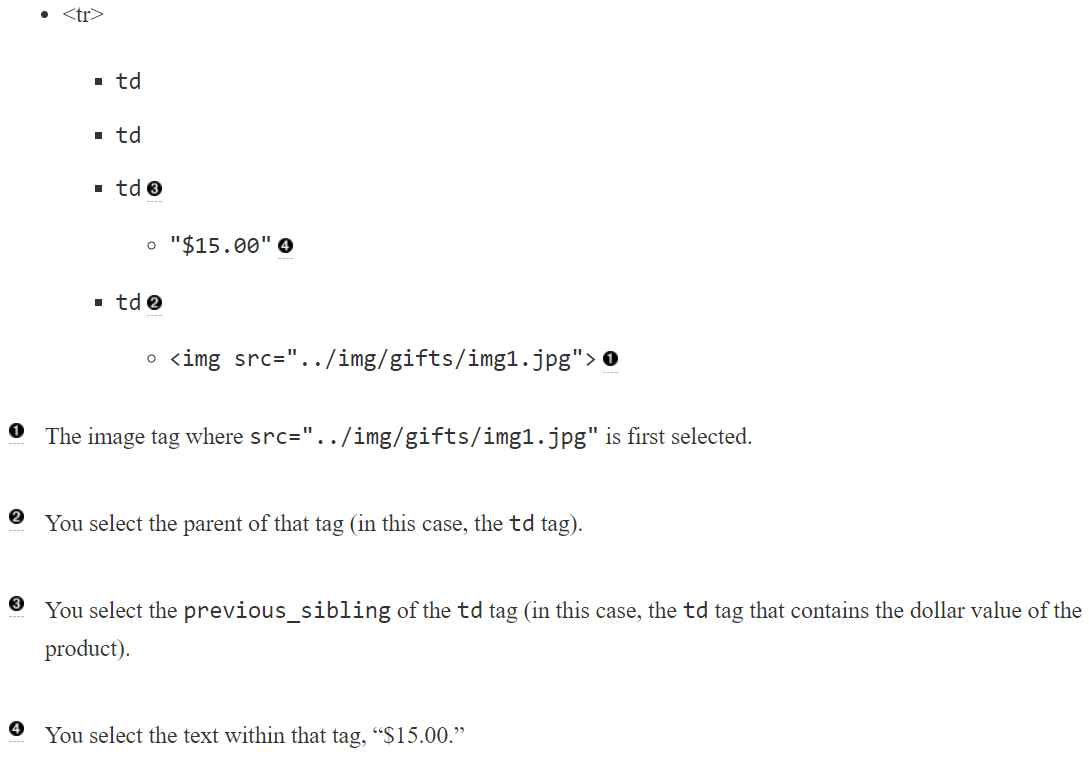

___

**Now go to "Module 4 Class Exercise" notebook and complete Exercise 7.**

___